## Name : Vansh Kolte 
## Roll NO : 62
## Batch : C4
## Machine Learning Internal 2 (p1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [8]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [9]:
df.duplicated().sum()   ## its 0 no need to handle

0

In [10]:
# Check for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
# Fill missing values in 'ph' with the median ph
df['ph'].fillna(df['ph'].mean(), inplace=True)

# Fill missing values in 'Sulfate' 
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)

# Fill missing values in 'Trihalomethanes' with the median Trihalomethanes
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)



In [12]:
ms = df.isnull().sum()
ms


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

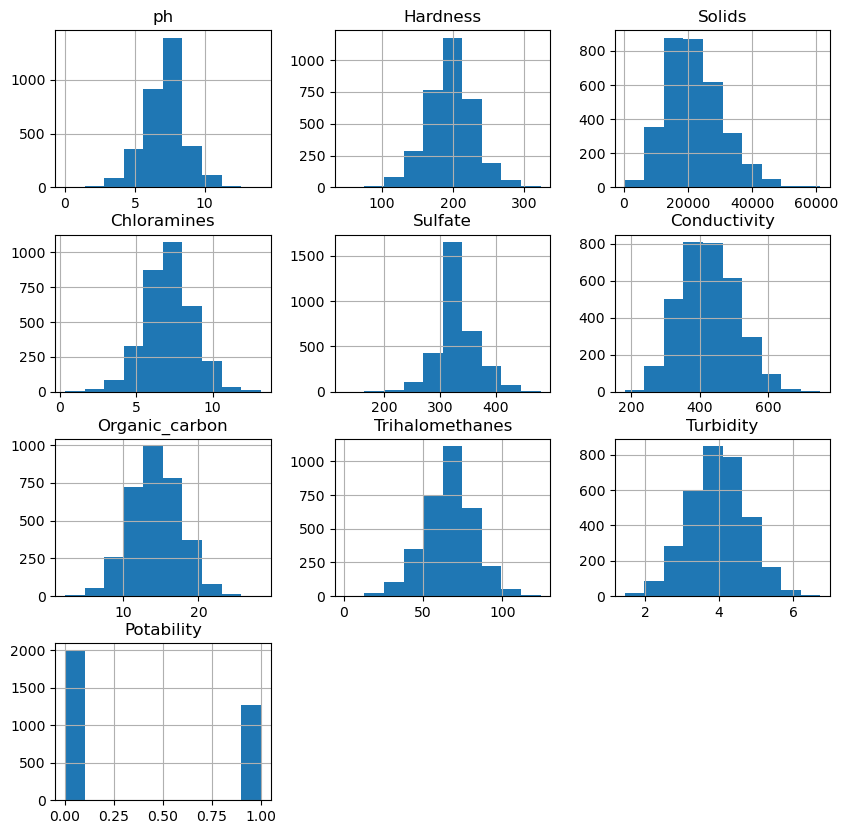

In [13]:
# Histograms for numerical features
df.hist(figsize=(10, 10))
plt.show()

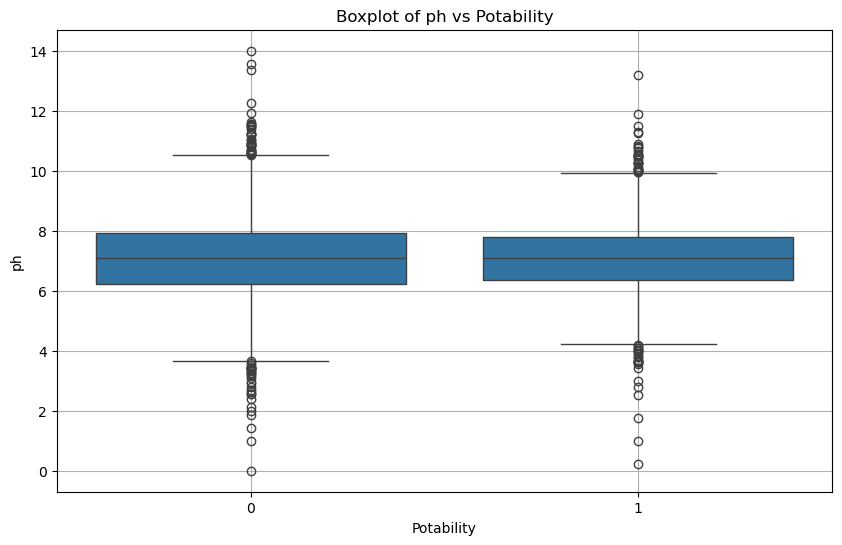

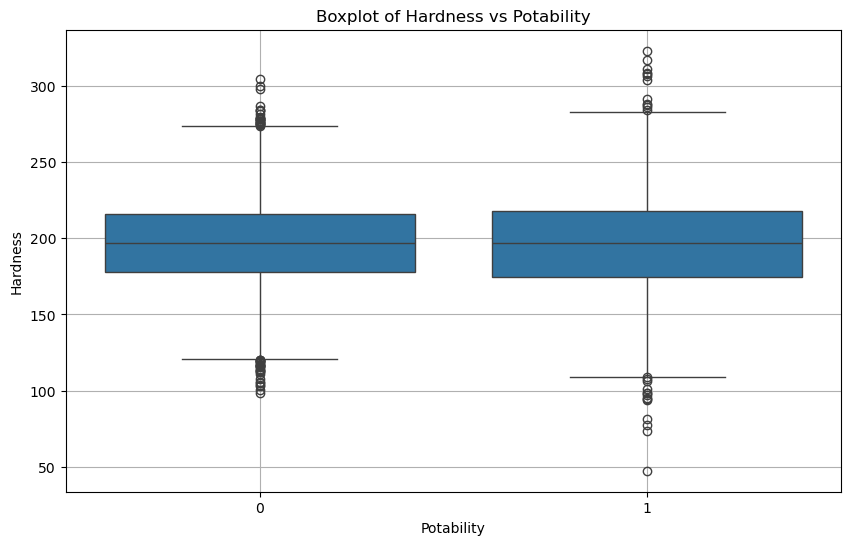

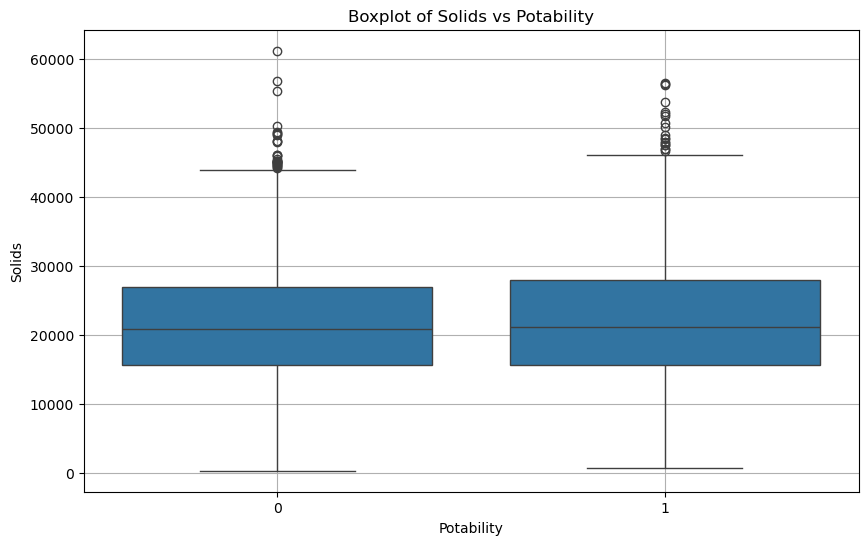

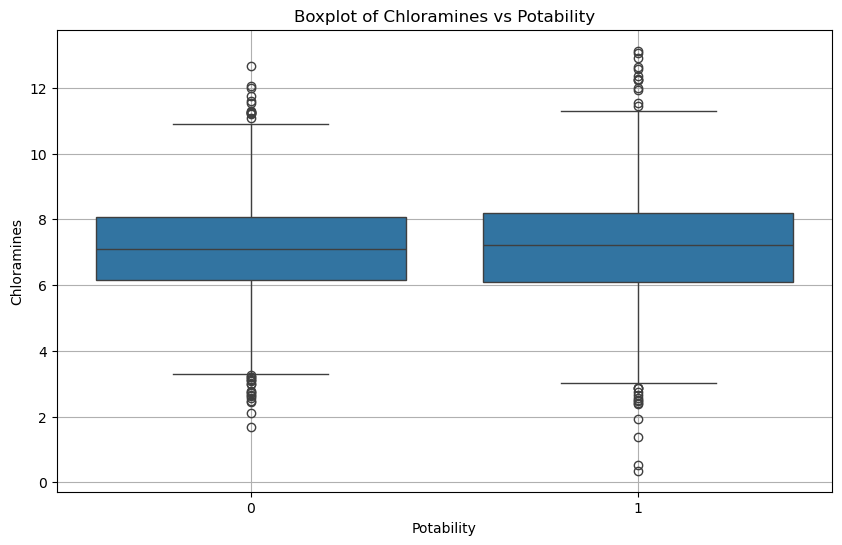

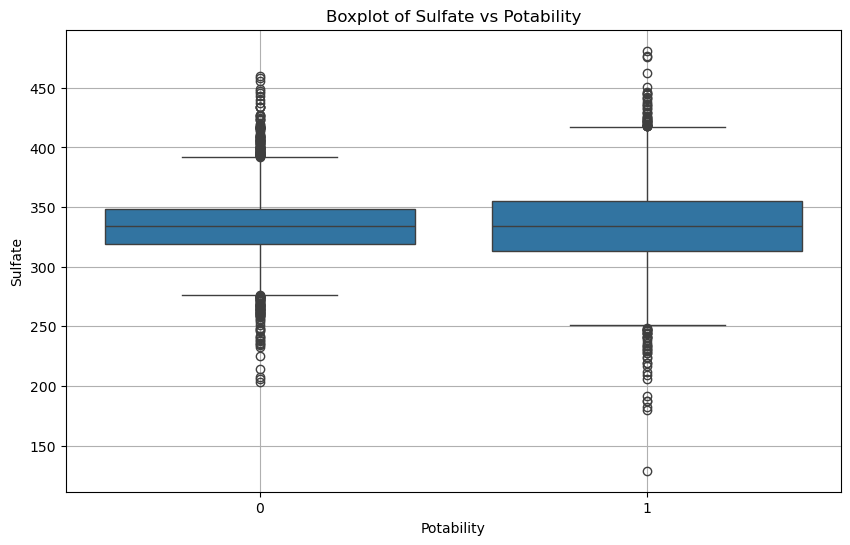

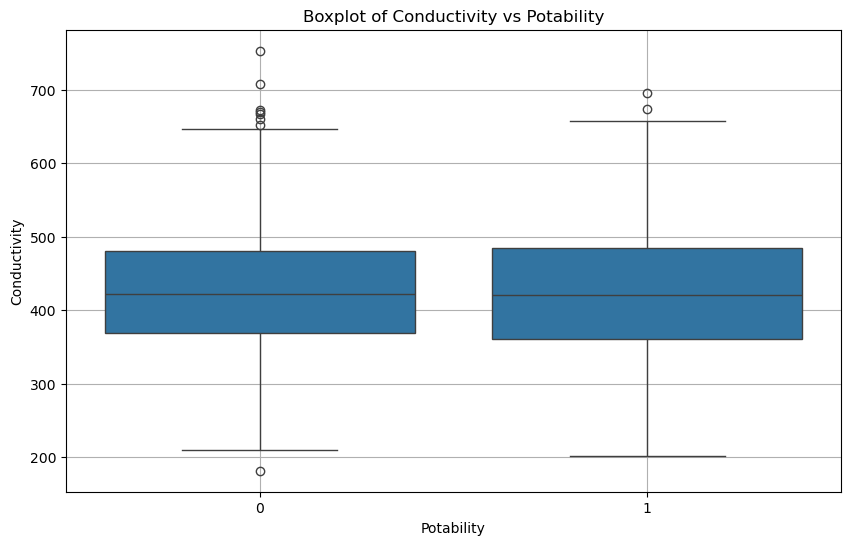

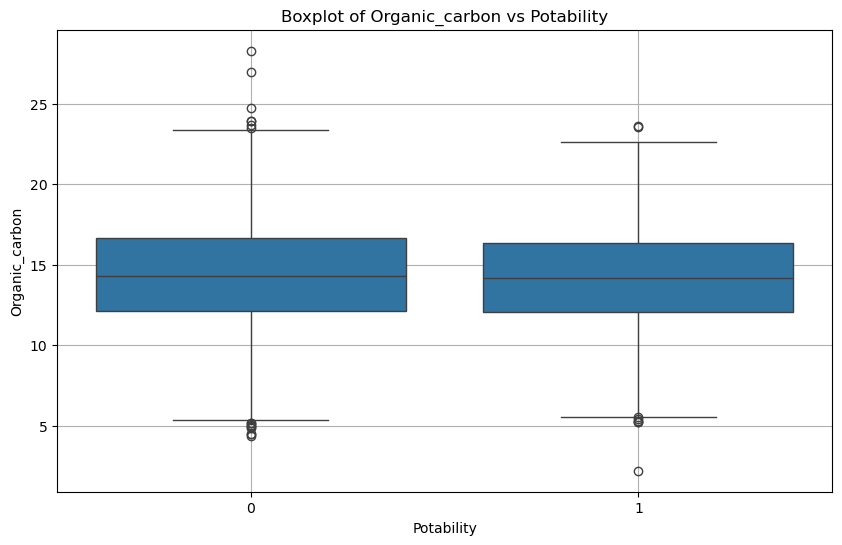

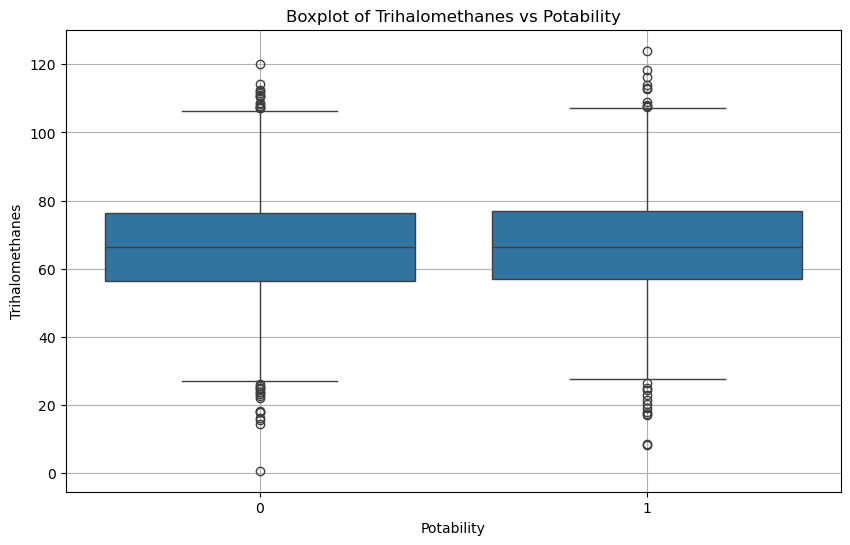

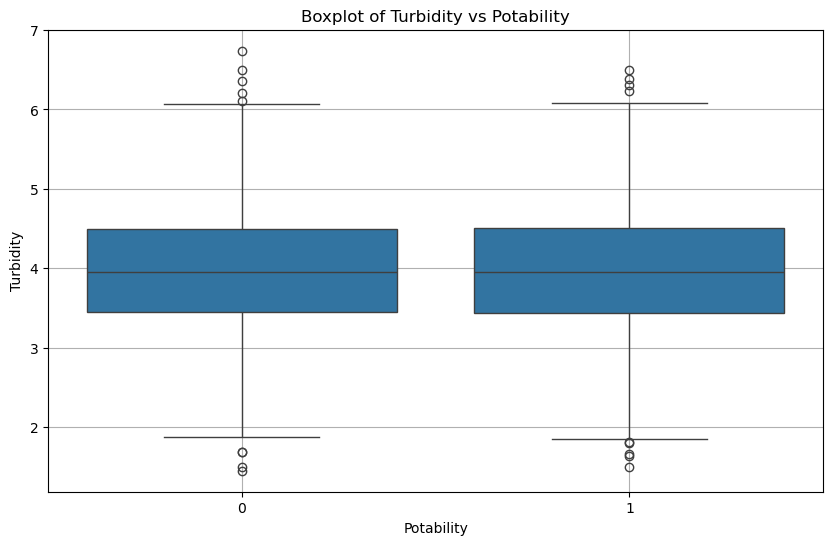

In [14]:
# List of features to plot against 'Potability'
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
            'Conductivity', 'Organic_carbon', 'Trihalomethanes', 
            'Turbidity']

# Create boxplots for each feature Bivariate
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Potability', y=feature, data=df)
    plt.title(f'Boxplot of {feature} vs Potability')
    plt.xlabel('Potability')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

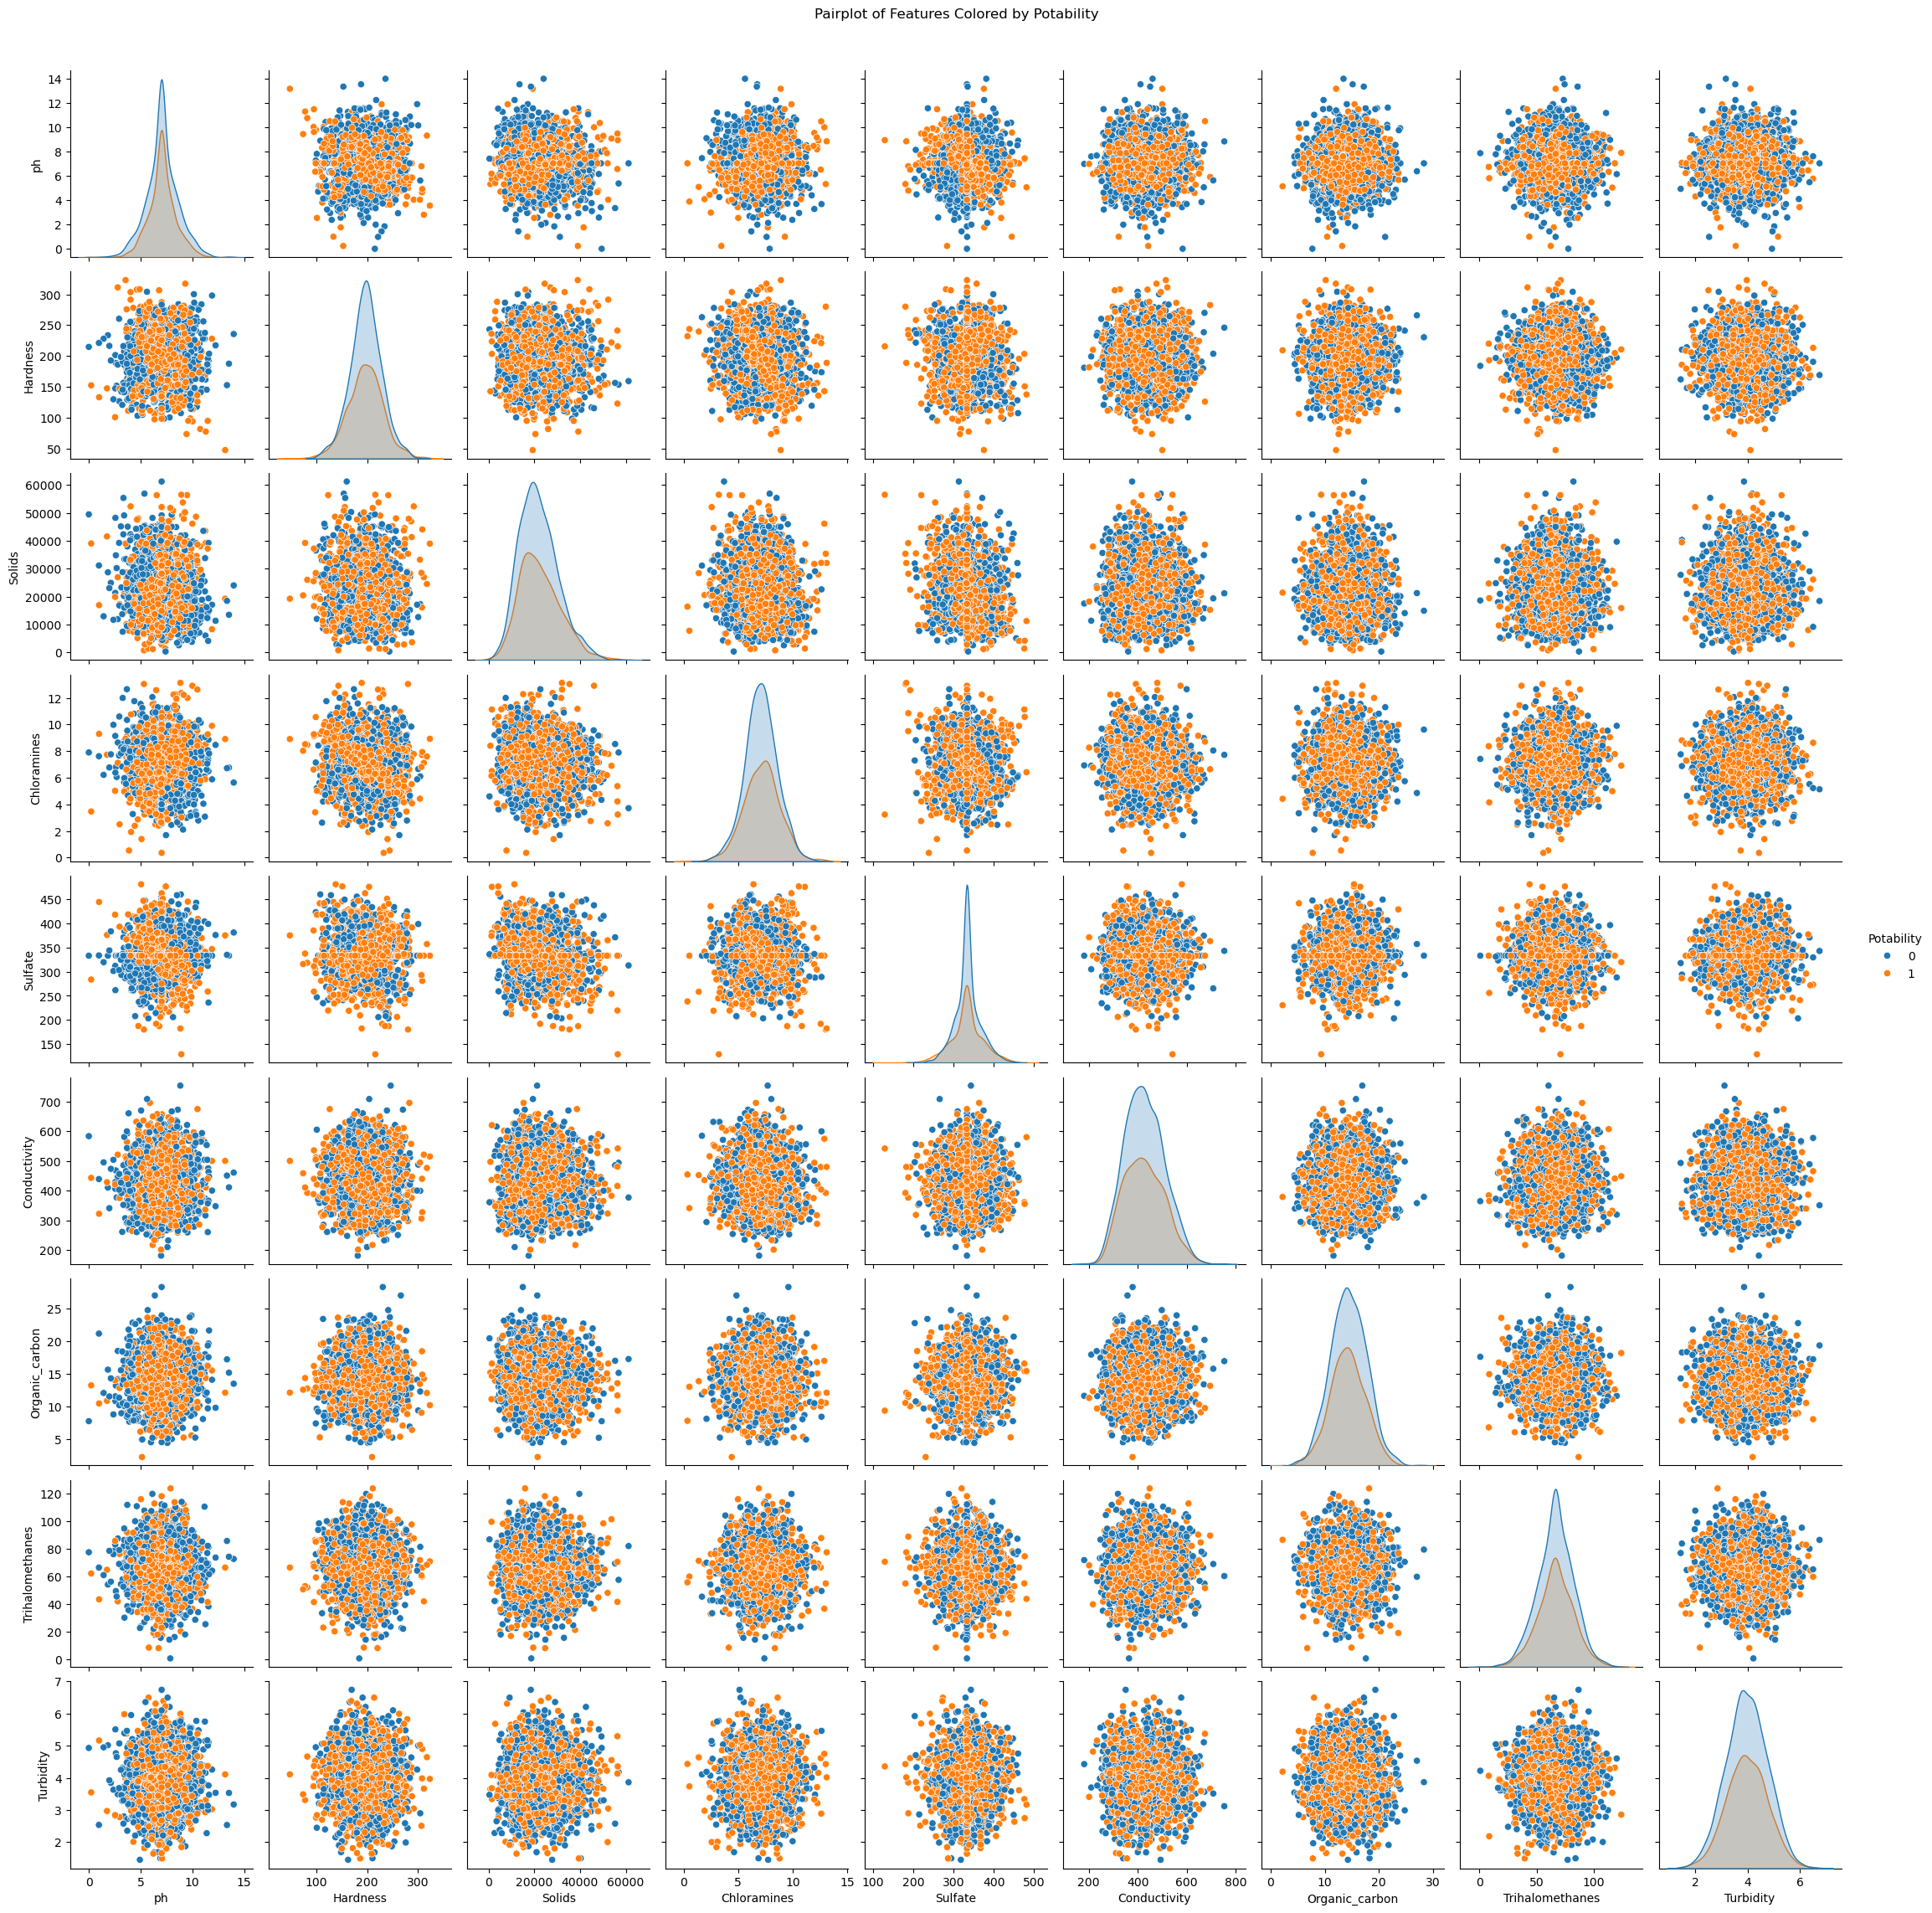

In [28]:
# # Create a pairplot
# sns.pairplot(df, hue='Potability', vars=features)
# plt.suptitle("Pairplot of Features Colored by Potability", y=1.02)
# plt.show()

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

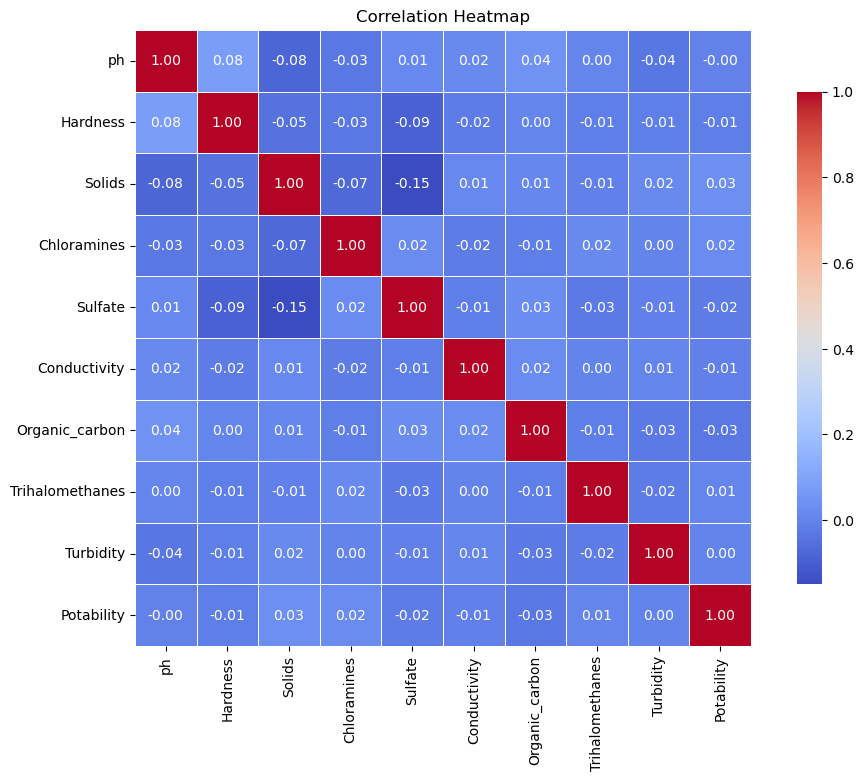

In [16]:
# Set the aesthetics for the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [14]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Potability'],axis=1)
Y = df['Potability']

In [15]:
df.shape

(3276, 10)

In [16]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
X_train.shape

(2620, 9)

In [18]:
rd = RandomForestClassifier(n_estimators=100 , random_state=0)

rd.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [19]:
Y_pred = rd.predict(X_test)

In [20]:
# Evaluate the performance of the classifier
accuracy = rd.score(X_test, Y_test)
print("Accuracy: %.2f" % accuracy)

Accuracy: 0.69


In [21]:
from sklearn.metrics import classification_report
print("Random Forest Classification Report:")
print(classification_report(Y_test, Y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       412
           1       0.67      0.34      0.45       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.69      0.69      0.66       656



#### Applying hyper paramter on Random Forest

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [23]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [24]:
# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [25]:
# Retrieve the best model from GridSearchCV or RandomizedSearchCV
best_rf = grid_search.best_estimator_  # or random_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Test set accuracy: ", accuracy)

Test set accuracy:  0.6920731707317073


### AdaBoost

In [44]:
from sklearn.metrics import classification_report
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=0)
ada_classifier.fit(X_train, Y_train)

AdaBoostClassifier(random_state=0)

In [45]:
y_pred_ab = ada_classifier.predict(X_test)

In [46]:
print("Adaboost Classification Report:")
print(classification_report(Y_test, y_pred_ab))

Adaboost Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       412
           1       0.54      0.22      0.31       244

    accuracy                           0.64       656
   macro avg       0.60      0.55      0.53       656
weighted avg       0.61      0.64      0.59       656



In [47]:
print("Accuracy:", accuracy_score(Y_test, y_pred_ab))

Accuracy: 0.6387195121951219


#### Applying hyper paramter on adaboost

In [39]:
# Initialize the AdaBoost model
ada = AdaBoostClassifier()

In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.5, 1, 1.5],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [49]:
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 300}
Best Score: 0.6232824427480916
Test Set Accuracy: 0.6432926829268293
